In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Set workspace

Create dataset with classes

In [18]:
d_classes = pd.read_csv('files.csv', delimiter=';')

d_classes.sort_values(by=['folder'], inplace=True)
d_classes.reset_index(drop=True, inplace=True)
d_classes.drop(columns = ['Unnamed: 0','folder'], inplace=True)

d_classes['class']=d_classes['class'].replace([1, 2, 3, 4, 5], 1)
d_classes['class']=d_classes['class'].replace([6, 7, 8], 2)
d_classes['class']=d_classes['class'].replace([9, 10], 3)

d_classes

,code,class
0,MR,1
1,MR,1
2,MR,1
3,MR,1
4,MR,1
...,...,...
463,FB,2
464,FF,2
465,FF,2
466,FS,2


Create list of datasets

In [19]:
path = "C:/Users/markh/Desktop/Università/Healthcare Data/SL4HD/Train2/"
#path = "C:/Users/giuli/OneDrive/Desktop/SL4HD/Train2/"
#path = "C:/Users/hp/OneDrive - Politecnico di Milano/Università/STATISTICAL_LEARNING_FOR_HEALTHCAREDATA/SL4HD/Train2/"

all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    d_file = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(d_file)

### Feature engineering

Means

<Axes: xlabel='class'>

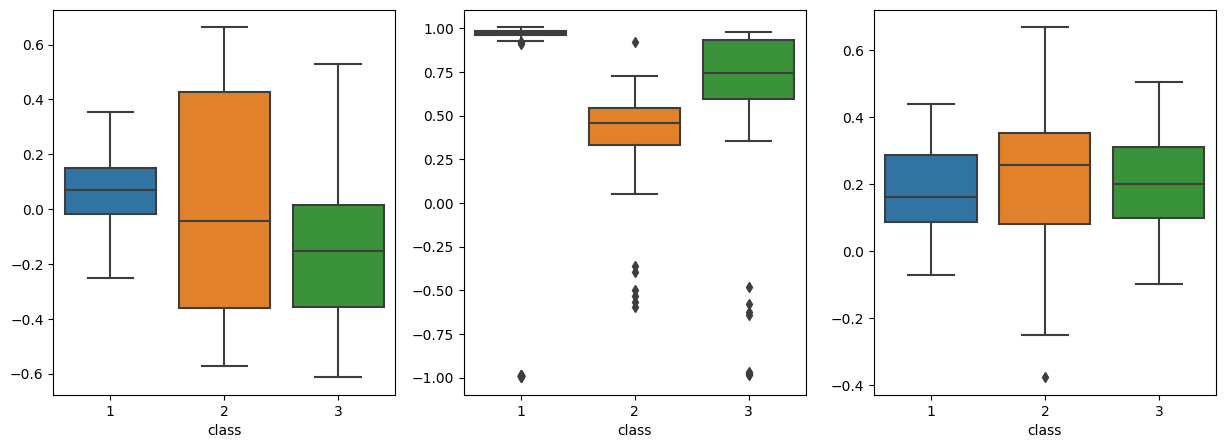

In [20]:
means_x = []
means_y = []
means_z = []

for i in np.arange(len(li)):
    means_x.append(li[i].x.mean())
    means_y.append(li[i].y.mean())
    means_z.append(li[i].z.mean())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=means_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=means_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=means_z,data=d_classes,ax=axs[2])

Variances

<Axes: xlabel='class'>

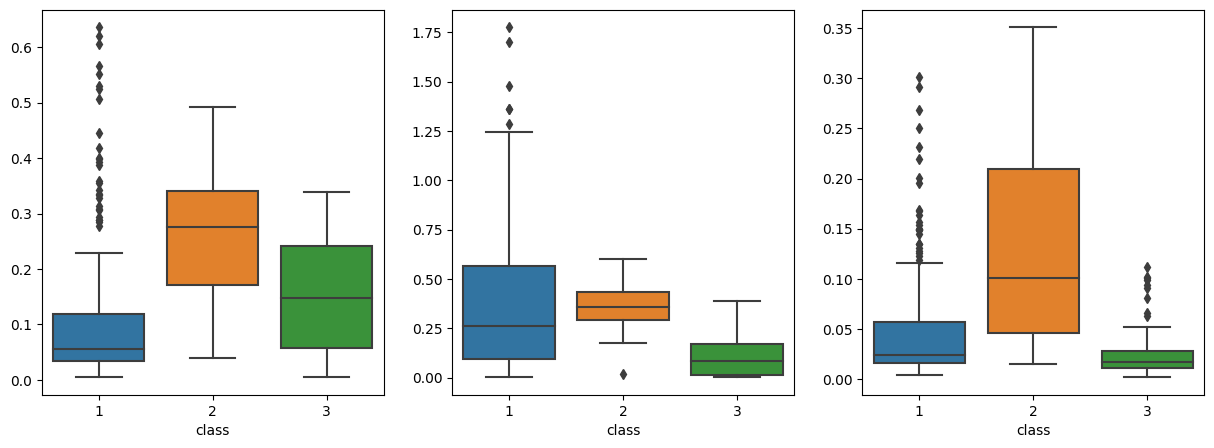

In [21]:
vars_x = []
vars_y = []
vars_z = []

for i in np.arange(len(li)):
    vars_x.append(li[i].x.var())
    vars_y.append(li[i].y.var())
    vars_z.append(li[i].z.var())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=vars_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=vars_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=vars_z,data=d_classes,ax=axs[2])

Peaks over threshold

<Axes: xlabel='class'>

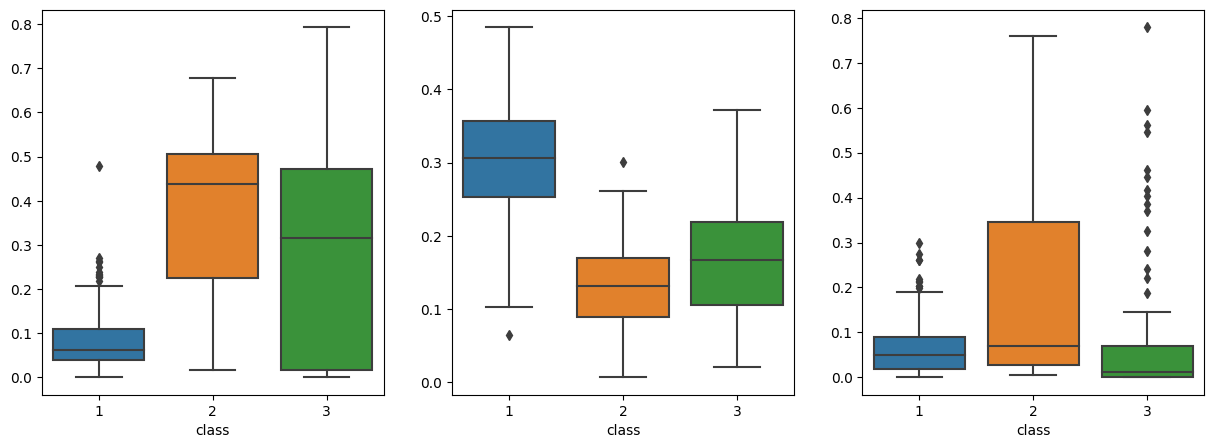

In [22]:
peaks_x = []
peaks_y = []
peaks_z = []
eps_x = 0.5
eps_y = 1
eps_z = 0.5

for i, item in enumerate(li):
    count_x, count_y, count_z = 0, 0, 0
    len_t = len(item.t)
    x_vals = item.x
    y_vals = item.y
    z_vals = item.z
    for j, t_val in enumerate(item.t):
        if abs(x_vals[j]) > eps_x:
            count_x += 1
        if abs(y_vals[j]) > eps_y:
            count_y += 1
        if abs(z_vals[j]) > eps_z:
            count_z += 1
    peaks_x.append(count_x/len_t)
    peaks_y.append(count_y/len_t)
    peaks_z.append(count_z/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=peaks_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=peaks_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=peaks_z,data=d_classes,ax=axs[2])

Positive/Total

<Axes: xlabel='class'>

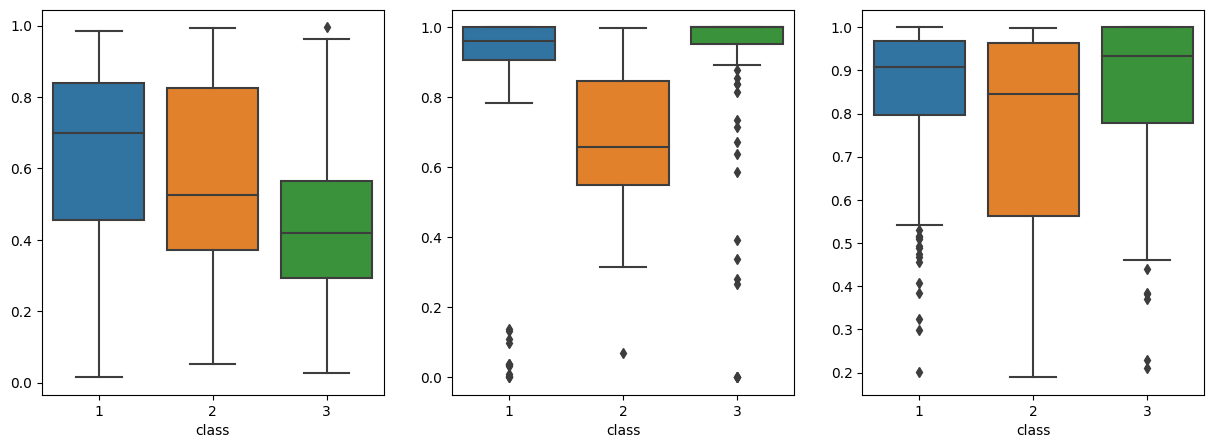

In [23]:
pn_x = []
pn_y = []
pn_z = []

for i in np.arange(len(li)):
    pos_x = li[i][li[i].x>=0].x.count()
    neg_x = li[i][li[i].x<0].x.count()

    pos_y = li[i][li[i].y>=0].y.count()
    neg_y = li[i][li[i].y<0].y.count()

    pos_z = li[i][li[i].z>=0].z.count()
    neg_z = li[i][li[i].z<0].z.count()

    pn_x.append(pos_x/(pos_x+neg_x))
    pn_y.append(pos_y/(pos_y+neg_y))
    pn_z.append(pos_z/(pos_z+neg_z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=pn_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=pn_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=pn_z,data=d_classes,ax=axs[2])

Energy

<Axes: xlabel='class'>

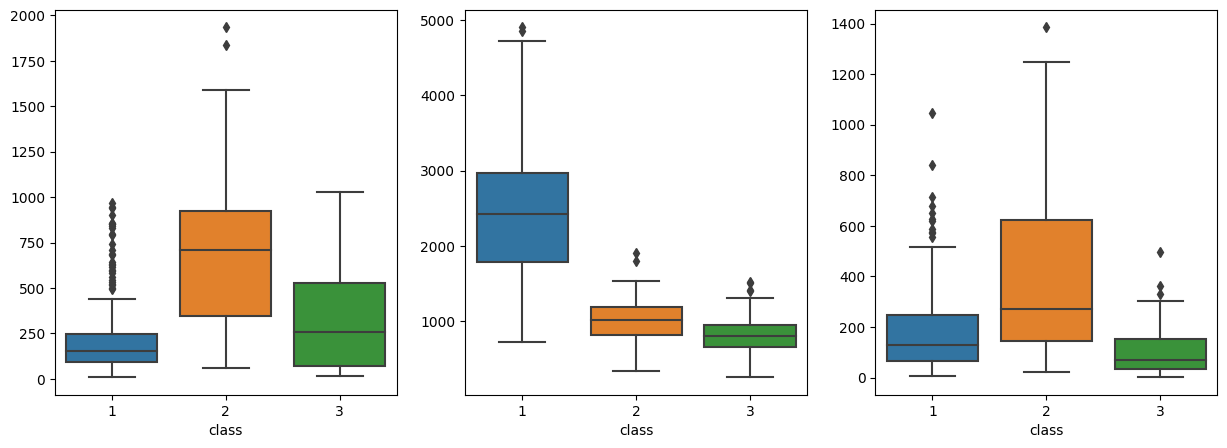

In [24]:
energies_x = []
energies_y = []
energies_z = []

for i in np.arange(len(li)):

    en_x = np.sum(li[i].x**2)
    en_y = np.sum(li[i].y**2)
    en_z = np.sum(li[i].z**2)
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    energies_x.append(en_x)
    energies_y.append(en_y)
    energies_z.append(en_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=energies_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=energies_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=energies_z,data=d_classes,ax=axs[2])

### Create final dataset

In [27]:
columns = []
for prefix in ['x', 'y', 'z']:
    columns.append(f"mean_{prefix}")
    columns.append(f"var_{prefix}")
    
d = pd.DataFrame({'mean_x': means_x,
                  'mean_y': means_y,
                  'mean_z': means_z,
                  'var_x': vars_x,
                  'var_y': vars_y,
                  'var_z': vars_z,
                  '%_peaks_x': peaks_x,
                  '%_peaks_y': peaks_y,
                  '%_peaks_z': peaks_z,
                  '%_positive_x': pn_x,
                  '%_positive_y': pn_y,
                  '%_positive_z': pn_z})
            
d = pd.concat([d,d_classes],axis=1)
d = d.drop('code',axis=1)
d

,mean_x,mean_y,mean_z,var_x,var_y,var_z,%_peaks_x,%_peaks_y,%_peaks_z,%_positive_x,%_positive_y,%_positive_z,class
0,0.197327,0.984034,0.204366,0.635922,1.034954,0.157123,0.261976,0.353293,0.140719,0.740269,0.896707,0.854042,1
1,0.256494,0.971935,0.040016,0.358201,0.907888,0.149493,0.197133,0.294504,0.100358,0.863799,0.881720,0.581840,1
2,0.234874,0.987340,0.099502,0.398661,0.952047,0.128058,0.207510,0.314229,0.091568,0.858366,0.895916,0.754282,1
3,0.135252,0.978889,0.205274,0.551640,1.362784,0.195095,0.263555,0.412491,0.169526,0.723404,0.879890,0.860673,1
4,0.057615,0.968606,0.293164,0.524964,1.285501,0.268192,0.226877,0.321545,0.260609,0.572905,0.898259,0.861262,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.418134,-0.397167,0.068148,0.333795,0.477936,0.017336,0.466268,0.260609,0.012514,0.642002,0.447225,0.795430,2
464,-0.504110,-0.497165,-0.013886,0.235744,0.364027,0.019134,0.429648,0.163317,0.004188,0.073702,0.388610,0.531826,2
465,-0.504246,-0.564383,-0.036012,0.335457,0.303479,0.031983,0.487069,0.206897,0.013793,0.219828,0.069828,0.465517,2
466,-0.084112,-0.532522,0.431918,0.115677,0.509875,0.268020,0.048199,0.203324,0.379501,0.111357,0.361773,0.910249,2
